In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

## Loading the datasets

In [35]:
customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv("Products.csv")
transactions_df = pd.read_csv("Transactions.csv")

## Convert dates to datetime format

In [38]:
transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"])
customers_df["SignupDate"] = pd.to_datetime(customers_df["SignupDate"])

In [40]:
customer_transactions = transactions_df.merge(customers_df, on="CustomerID")
customer_features = customer_transactions.groupby("CustomerID").agg({"Quantity": "sum","TotalValue": "sum",}).reset_index()

## Customer Segmentation-Clustering

In [42]:
X = customer_features[["Quantity", "TotalValue"]]
db_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    db_score = davies_bouldin_score(X, labels)
    db_scores[k] = db_score

optimal_clusters = min(db_scores, key=db_scores.get)
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
customer_features["Cluster"] = kmeans.fit_predict(X)
final_db_index = davies_bouldin_score(X, customer_features["Cluster"])

## Visual representation of clusters is generated

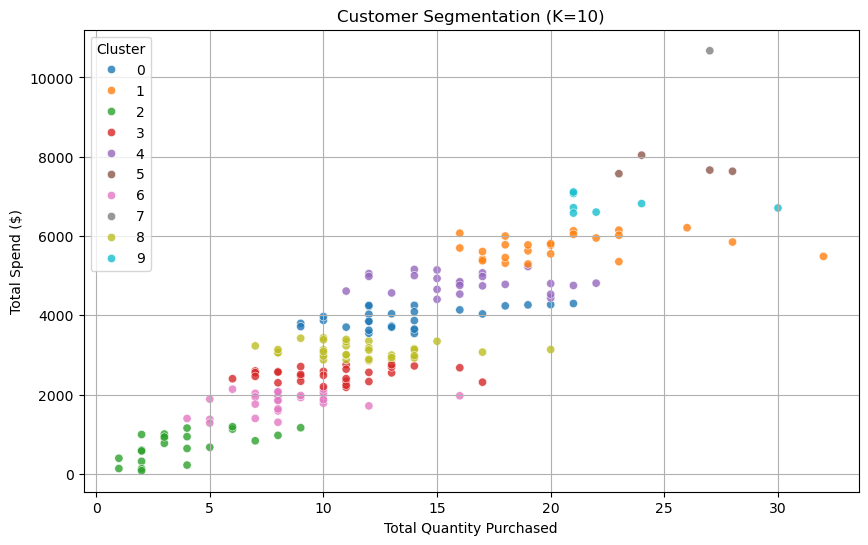

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_features["Quantity"], 
    y=customer_features["TotalValue"], 
    hue=customer_features["Cluster"], 
    palette="tab10", 
    alpha=0.8
)
plt.title(f"Customer Segmentation (K={optimal_clusters})")
plt.xlabel("Total Quantity Purchased")
plt.ylabel("Total Spend ($)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


## Display clustering results

In [46]:
clustering_results = {
    "Number of Clusters": optimal_clusters,
    "DB Index": final_db_index,
}
print(clustering_results)

{'Number of Clusters': 10, 'DB Index': 0.4176025701333674}
